In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
import pylab
pylab.rcParams['figure.figsize'] = (3.0, 3.0)

Dimensiones de la imagen:  (454, 684)
Tipo de dato:  uint8
Nivel máximo de intensidad:  255
Nivel mínimo de intensidad:  0


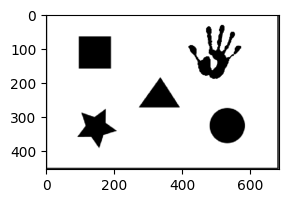

In [2]:
input_image=cv2.imread('imagen-binaria.png', cv2.IMREAD_GRAYSCALE)
img_max = np.max(input_image)
img_min = np.min(input_image)
print("Dimensiones de la imagen: ", input_image.shape)
print("Tipo de dato: ", input_image.dtype)
print("Nivel máximo de intensidad: ", img_max)
print("Nivel mínimo de intensidad: ", img_min)
plt.imshow(input_image, cmap='gray')
plt.show()

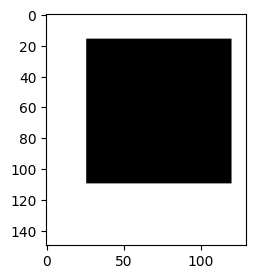

In [36]:
patch = (input_image[50:200, 70:200] > 100).astype(np.uint8)
plt.imshow(patch, cmap='gray')
plt.show()

In [37]:
def four_adyacency(img, x0, y0, V, pos='arriba'):
    if pos == 'arriba' and img[x0,y0]==V and img[x0,y0]==img[x0-1, y0]:
        return True
    elif pos == 'abajo' and img[x0,y0]==V and img[x0,y0]==img[x0+1, y0]:
        return True
    elif pos == 'izq' and img[x0,y0]==V and img[x0,y0]==img[x0, y0-1]:
        return True
    elif pos == 'der' and img[x0,y0]==V and img[x0,y0]==img[x0, y0+1]:
        return True
    else:
        return False
    
def display_neighbors(img, x0, y0):
    print('   |   |')
    print(' ' + str(img[x0-1,y0-1]) + ' | ' + str(img[x0-1,y0]) + ' | ' + str(img[x0-1,y0+1]))
    print('   |   |')
    print('-----------')
    print('   |   |')
    print(' ' + str(img[x0,y0-1]) + ' | ' + str(img[x0,y0]) + ' | ' + str(img[x0,y0+1]))
    print('   |   |')
    print('-----------')
    print('   |   |')
    print(' ' + str(img[x0+1,y0-1]) + ' | ' + str(img[x0+1,y0]) + ' | ' + str(img[x0+1,y0+1]))
    print('   |   |')

In [47]:
x = 16
y = 27
V = 0
arr = four_adyacency(patch, x0=x, y0=y, V=V)
ab = four_adyacency(patch, x0=x, y0=y, V=V, pos='abajo')
izq = four_adyacency(patch, x0=x, y0=y, V=V, pos='izq')
der = four_adyacency(patch, x0=x, y0=y, V=V, pos='der')
print(f"El píxel ({x},{y}) cumple la 4 adyacencia:\n Arriba: {arr}\n Abajo: {ab}\n Izquierda: {izq}\n Derecha: {der}")
display_neighbors(patch, x0=x, y0=y)

El píxel (16,27) cumple la 4 adyacencia:
 Arriba: False
 Abajo: True
 Izquierda: True
 Derecha: True
   |   |
 1 | 1 | 1
   |   |
-----------
   |   |
 0 | 0 | 0
   |   |
-----------
   |   |
 0 | 0 | 0
   |   |
